In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

RANDOM_SEED = 123

## I. Regression modeling

In [ ]:
from io import StringIO

data_string = """
Drugs	Score
0	1.17	78.93
1	2.97	58.20
2	3.26	67.47
3	4.69	37.47
4	5.83	45.65
5	6.00	32.92
6	6.41	29.97
7	6.00	70.00
"""

lsd_math = pd.read_table(StringIO(data_string), sep='\t', index_col=0)
lsd_math

,Drugs,Score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97
7,6.00,70.00


<AxesSubplot:xlabel='Drugs'>

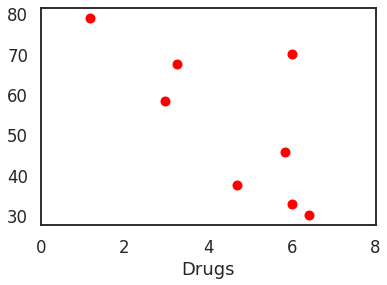

In [ ]:
# See the data
lsd_math.plot(x='Drugs',y='Score', style='ro', legend=False, xlim=(0,8))

#### Parameter estimation
the smallest sum of the squared differences between $\hat{y}$ and $y$.

$$R^2 = \sum_i (y_i - [\beta_0 + \beta_1 x_i])^2 = \sum_i \epsilon_i^2 $$

In [ ]:
# θ is the vector of β: θ = [β_0, β_1]
r_squares = lambda θ, x, y: np.sum((y - θ[0] - θ[1]*x) ** 2)

# Test
θ = [0, 0.7]
r_squares(θ, lsd_math.Drugs, lsd_math.Score)

22200.964725

In [ ]:
# Minimising sum of square using SciPy
x,y = lsd_math.T.values
θ = fmin(r_squares, [0,1], args=(x,y))
θ

Optimization terminated successfully.
         Current function value: 1217.393236
         Iterations: 97
         Function evaluations: 181


array([84.19929297, -6.96350623])

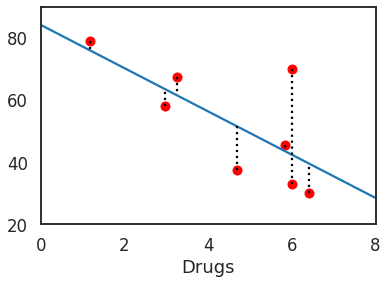

In [ ]:
# Plot the line with observations
ax = lsd_math.plot(x='Drugs', y='Score', style='ro', 
                   legend=False, xlim=(0,8), ylim=(20,90))
ax.plot([0,10], [θ[0], θ[0] + θ[1]*10])
for xi, yi in zip(x,y):
    ax.plot([xi]*2, [yi, θ[0] + θ[1]*xi], 'k:')

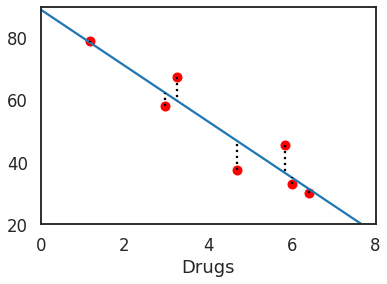

### Alternative loss functions

In [ ]:
sum_abs = lambda θ, x, y: np.sum(np.abs(y - θ[0] - θ[1]*x))

θ = fmin(sum_abs, [0,0], args=(x, y))
θ

Optimization terminated successfully.
         Current function value: 67.891256
         Iterations: 136
         Function evaluations: 260


array([89.86192602, -9.34351148])

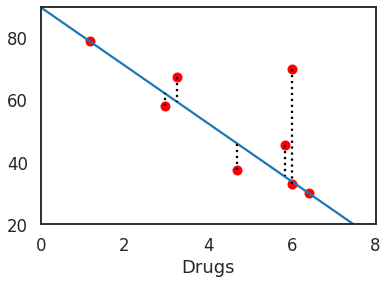

In [ ]:
# Plot the line with observations
ax = lsd_math.plot(x='Drugs', y='Score', style='ro', 
                   legend=False, xlim=(0,8), ylim=(20,90))
ax.plot([0,10], [θ[0], θ[0] + θ[1]*10])
for xi, yi in zip(x,y):
    ax.plot([xi]*2, [yi, θ[0] + θ[1]*xi], 'k:')

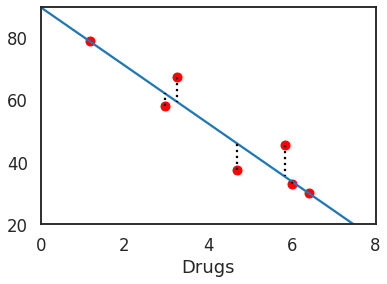